<a href="https://colab.research.google.com/github/BeytullahYayla/Computer-Vision-For-Self-Driving-Cars/blob/main/BehavioralCloning/Behavioral_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone Repository Which Contains Dataset

In [28]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


## Import Required Libraries

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplim
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import ntpath
from keras.layers.convolutional import Convolution2D

In [30]:
!ls track

driving_log.csv  IMG


In [31]:
import os

In [32]:
path='track'#Dataset path
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(path,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()#We can observe our first 5 rows in our pandas dataset.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [33]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail

Our image paths consists of local path which belong to another person. Because we cloned dataset from github. So we need to method that can split our path and returns just with .jpg extension part. <b> path_leaf()</b> method returns our tail of path. 

In [34]:
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


We got rid of head part of our paths using apply(path_leaf) for all of our center,left and right image path.

## Distribution of our dataset

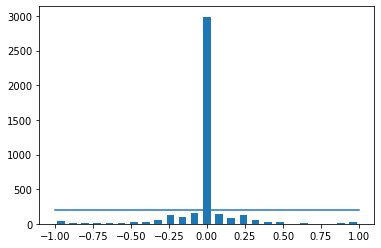

In [35]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [36]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [37]:
hist

array([  35,    6,    6,    6,   13,    8,   24,   22,   53,  131,   99,
        158, 2990,  137,   86,  126,   54,   22,   19,    2,    9,    4,
          4,    6,   33])

In [38]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))



removed: 2790
remaining: 1263


Firstly we defined an empty list called <b>remove_list</b>.We have nested loops.First loop iterates the len of the number of the bins.Which consists our steerings.At every iteration we define an empty list to balance our data by removing values that remaining above a certain threshold. In our example this threshold can be considered as 400. After we applied this operation 1463 data is remained. 

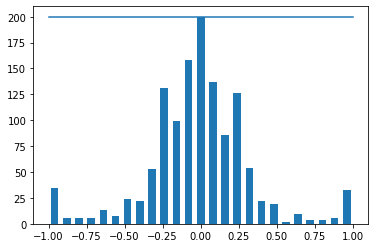

In [39]:

hist, _ = np.histogram(data['steering'], num_bins)

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

As we can see, now our distrubition of data is more uniformed.

## Training and Validation Split

In [40]:
print(data.iloc[40])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(path + '/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))



center      center_2018_07_16_17_11_48_520.jpg
left        left_2018_07_16_17_11_48_520.jpg  
right       right_2018_07_16_17_11_48_520.jpg 
steering   -0.21399                           
throttle    1.0                               
reverse     0.0                               
speed       30.19007                          
Name: 66, dtype: object
Training Samples: 3031
Valid Samples: 758


Text(0.5, 1.0, 'y_val distribution')

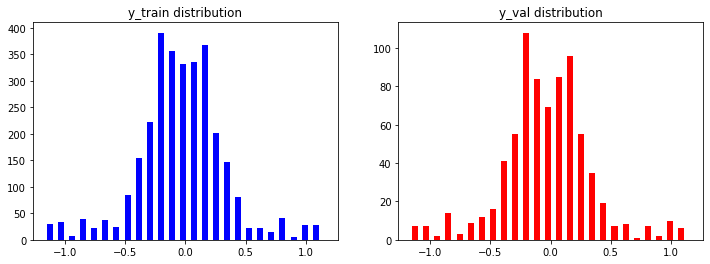

In [41]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title("y_train distribution")
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title("y_val distribution")

## Image Preprocessing

In [42]:
def img_preprocess(image_to_preprocess):
    image_to_preprocess=mplim.imread(image_to_preprocess)
    image_to_preprocess = image_to_preprocess[60 : 135]
    image_to_preprocess = cv2.cvtColor(image_to_preprocess, cv2.COLOR_RGB2YUV)
    image_to_preprocess = cv2.GaussianBlur(image_to_preprocess,  (3, 3), 0)
    image_to_preprocess = cv2.resize(image_to_preprocess, (200, 66))
    image_to_preprocess = image_to_preprocess/255
    return image_to_preprocess

track/IMG/right_2018_07_16_17_11_53_922.jpg


Text(0.5, 1.0, 'Preprocessed image')

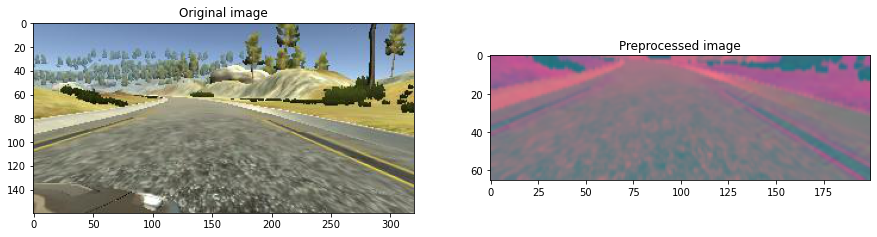

In [43]:
img_path=X_train[100]
print(img_path)
fig,axs=plt.subplots(1,2,figsize=(15,10))
original_image=mplim.imread(img_path)
axs[0].imshow(original_image)
axs[0].set_title("Original image")
preprocessed_img=img_preprocess(X_train[100])
axs[1].imshow(preprocessed_img)
axs[1].set_title("Preprocessed image")

In [44]:
X_train=np.array(list(map(img_preprocess,X_train)))

In [45]:
X_valid=np.array(list(map(img_preprocess,X_valid)))

(3031, 66, 200, 3)


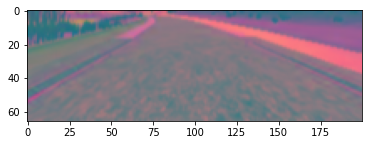

In [53]:
print(X_train.shape)
plt.imshow(X_train[random.randint(0,len(X_train)-1)])


## Model

## Nvdia Model Architecture

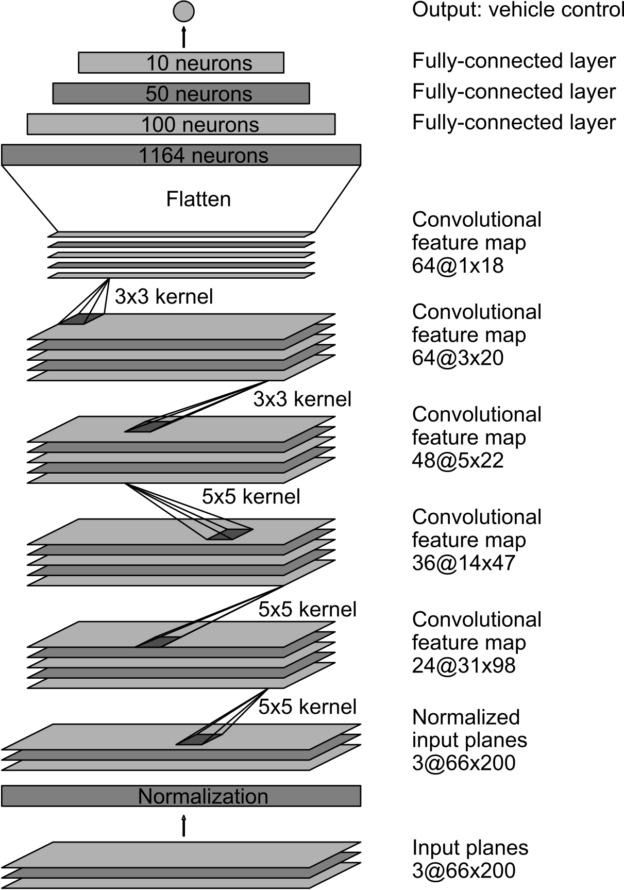

In [55]:
def nvidia_model():
  model=Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='relu'))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation='relu'))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation='relu'))
  model.add(Convolution2D(64,(3,3),activation='relu'))
  model.add(Convolution2D(64,(3,3),activation='relu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dropout(0.5))
  model.add(Dense(100))
 
  model.add(Dense(50))
  model.add(Dense(10))
  model.add(Dense(1))

  model.compile(optimizer='adam',loss='mse')

  return model

In [70]:
def nvidia_updated_model():
  model = Sequential()
  model.add(Convolution2D(24,(5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))

  model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Dropout(0.5))


  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))

  model.add(Dense(1))

  model.compile(loss='mse', optimizer='adam')
  return model

In [64]:
model=nvidia_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_17 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_6 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

In [72]:
updated_model=nvidia_updated_model()
updated_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_12 (Dropout)        (None, 1, 18, 64)         0         
                                                                 
 flatten_5 (Flatten)         (None, 1152)             

In [59]:
history=model.fit(X_train,y_train,epochs=30,batch_size=50,verbose=1,shuffle=True,validation_data=(X_valid,y_valid))

Epoch 1/30
61/61 [==============================] - 20s 322ms/step - loss: 0.1325 - val_loss: 0.1312
Epoch 2/30
61/61 [==============================] - 19s 304ms/step - loss: 0.1298 - val_loss: 0.1330
Epoch 3/30
61/61 [==============================] - 19s 305ms/step - loss: 0.1323 - val_loss: 0.1331
Epoch 4/30
61/61 [==============================] - 18s 302ms/step - loss: 0.1312 - val_loss: 0.1328
Epoch 5/30
61/61 [==============================] - 18s 302ms/step - loss: 0.1311 - val_loss: 0.1336
Epoch 6/30
61/61 [==============================] - 21s 339ms/step - loss: 0.1313 - val_loss: 0.1329
Epoch 7/30
61/61 [==============================] - 20s 323ms/step - loss: 0.1315 - val_loss: 0.1331
Epoch 8/30
61/61 [==============================] - 19s 304ms/step - loss: 0.1313 - val_loss: 0.1330
Epoch 9/30
61/61 [==============================] - 19s 304ms/step - loss: 0.1309 - val_loss: 0.1338
Epoch 10/30
61/61 [==============================] - 18s 303ms/step - loss: 0.1312 - val_lo

Text(0.5, 0, 'Epoch')

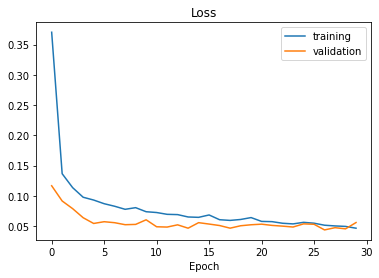

In [75]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['training','validation'])
plt.title("Loss")
plt.xlabel("Epoch")

In [73]:
history=updated_model.fit(X_train,y_train,epochs=30,batch_size=50,verbose=1,shuffle=True,validation_data=(X_valid,y_valid))

Epoch 1/30
61/61 [==============================] - 24s 378ms/step - loss: 0.3703 - val_loss: 0.1168
Epoch 2/30
61/61 [==============================] - 20s 324ms/step - loss: 0.1366 - val_loss: 0.0916
Epoch 3/30
61/61 [==============================] - 20s 326ms/step - loss: 0.1136 - val_loss: 0.0789
Epoch 4/30
61/61 [==============================] - 20s 325ms/step - loss: 0.0978 - val_loss: 0.0640
Epoch 5/30
61/61 [==============================] - 20s 326ms/step - loss: 0.0932 - val_loss: 0.0545
Epoch 6/30
61/61 [==============================] - 20s 326ms/step - loss: 0.0871 - val_loss: 0.0574
Epoch 7/30
61/61 [==============================] - 20s 327ms/step - loss: 0.0829 - val_loss: 0.0557
Epoch 8/30
61/61 [==============================] - 20s 326ms/step - loss: 0.0779 - val_loss: 0.0524
Epoch 9/30
61/61 [==============================] - 20s 326ms/step - loss: 0.0806 - val_loss: 0.0529
Epoch 10/30
61/61 [==============================] - 20s 326ms/step - loss: 0.0739 - val_lo

Text(0.5, 0, 'Epoch')

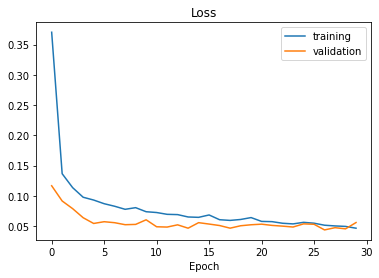

In [74]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['training','validation'])
plt.title("Loss")
plt.xlabel("Epoch")